In [1]:
import numpy as np
import sys
import os
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stats = {}
for pred in os.listdir('./'):
    if 'retest' in pred:
        print(pred)
        stats[pred]=[]
        with open(pred, 'r') as f:
            lines = f.readlines()
        for i in range(0, len(lines), 3):
            counter = re.sub('[\[\]]','', lines[i].strip()).split()
            counter = [int(c) for c in counter]
            prediction = lines[i+1].strip().split(':')[1]
            ospf = lines[i+2].strip()
            stats[pred].append([counter, prediction, ospf])
    

retest_loss_20
retest_loss_15
retest_loss_10
retest_loss_0


In [3]:
for k,i in stats.items():
    predicted_paths = []
    print(k, i[0][2])
    for x in i:
        predicted_paths.append(x[1])
    print(Counter(predicted_paths))
    print()


retest_loss_10 ospf:['r1', 'r2', 'r3']
Counter({"['r1', 'ri2', 'r3']": 121, "['r1', 'r2', 'r3']": 73, "['r1', 'ri2', 'ri3', 'r3']": 4, "['r1', 'ri2', 'ri1', 'ri4', 'r4', 'r3']": 2})

retest_loss_15 ospf:['r1', 'r2', 'r3']
Counter({"['r1', 'ri2', 'r3']": 116, "['r1', 'r2', 'r3']": 81, "['r1', 'ri2', 'ri1', 'ri4', 'r4', 'r3']": 2, "['r1', 'ri2', 'ri3', 'r3']": 1})

retest_loss_20 ospf:['r1', 'ri2', 'r3']
Counter({"['r1', 'ri2', 'r3']": 107, "['r1', 'r2', 'r3']": 91, "['r1', 'ri2', 'ri1', 'ri4', 'r4', 'r3']": 1, "['r1', 'ri2', 'ri3', 'r3']": 1})

retest_loss_0 ospf:['r1', 'r2', 'r3']
Counter({"['r1', 'r2', 'r3']": 114, "['r1', 'ri2', 'r3']": 79, "['r1', 'ri2', 'ri3', 'r3']": 6, "['r1', 'r6', 'ri4', 'r4', 'r3']": 1})



In [4]:
def get_line(x0, y0, x1, y1, log=False):
    x = np.linspace(x0, x1, 1000)
    x[0]=0
    m = (y1-y0)/float(x1-x0)
    if log:
        y = [np.log(m*x_) for x_ in x]
        y[0] = 0
    else:
        y = [m*x_ for x_ in x]
    return x, y

In [5]:
# bw = 300.0 #Mbps
# traffic = 50000000.0 #Mb
# retransmission = [[0.1, 0.05, 0.0365],[0.15, 0.075, 0.060],[0.2, 0.1, 0.091]]

# x = [0, 1.5]
# y = [0, traffic]

# lines = [':', '-', '-.']
# positions = [221, 222, 223, 224]
# plt.figure(figsize=(15, 12))

# for p,losses in enumerate(retransmission):
#     plt.subplot(positions[p])
#     plt.title('{:}% Link loss'.format(losses[0]*100))
#     plt.ylabel('Transmitted data [Mb]')
#     plt.xlabel('Transmission time [s]')
#     #plt.grid()
#     for j,loss in enumerate(losses):
#         final_time = traffic/bw * (1+loss)
#         x = [0, final_time]
#         x, y = get_line(0,0, final_time, traffic)
#         plt.plot(x,y, lines[j])        
#         plt.legend(['OSPF', 'Equal-cost multipath', 'LSTM'])
# # plt.savefig('prediction_cmp_grid.pdf')
# plt.show()


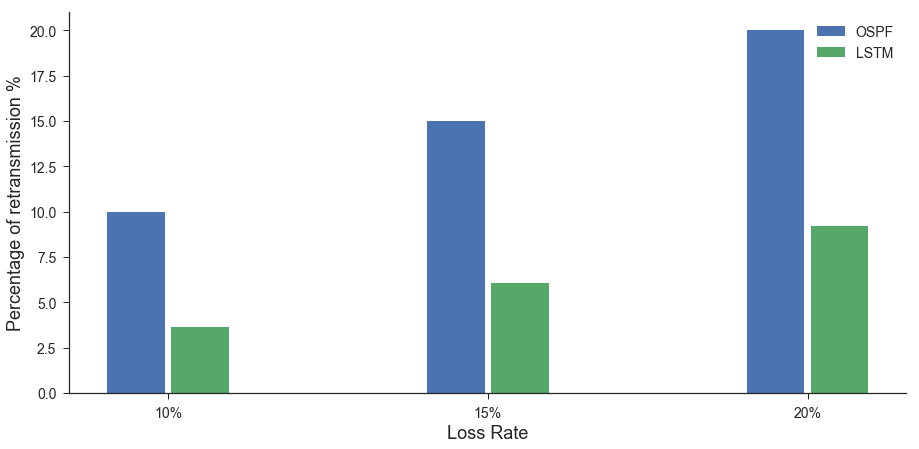

In [6]:
idx = np.arange(3)
x1 = [100, 100, 100]
x2 = [103.65, 106.08, 109.1]
x3 = [110, 115, 120]

ospf_ret = [10, 15, 20]
pred_ret = [3.65, 6.08, 9.2]
#ecmp = [5, 7.5, 10]

sns.set_style('ticks')
plt.figure(figsize=(15,7))
#plt.title('Retransmission comparison', fontsize=20)
plt.xlabel('Loss Rate', fontsize=18)
plt.ylabel('Percentage of retransmission %', fontsize=18)
#plt.plot((-0.5, 2.5), (100, 100), 'r-', label='No Loss')
#plt.bar(idx, x3, width=0.2, label='OSPF')
plt.bar(idx-0.1, ospf_ret, width=0.18, label='OSPF')
#plt.bar(idx, ecmp, width=0.18,label = 'ECMP')
plt.bar(idx + 0.1, pred_ret, width=0.18, label='LSTM')
plt.xticks(idx,['10%', '15%', '20%'], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(False)
sns.despine()
plt.savefig('prediction_cmp_bar.eps', transparent=True, format='eps', dpi=500,bbox_inches='tight')
plt.show()